In [1]:
import numpy as np 
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.datasets import load_boston
load_boston = load_boston()
x = load_boston.data
y = load_boston.target

data = pd.DataFrame(x,columns=load_boston.feature_names)
data["SalePrice"] = y
data.head()


C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,SalePrice
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [3]:
print(load_boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [4]:
print(data.shape)

(506, 14)


# EDA


In [5]:
data.isnull().sum()

CRIM         0
ZN           0
INDUS        0
CHAS         0
NOX          0
RM           0
AGE          0
DIS          0
RAD          0
TAX          0
PTRATIO      0
B            0
LSTAT        0
SalePrice    0
dtype: int64

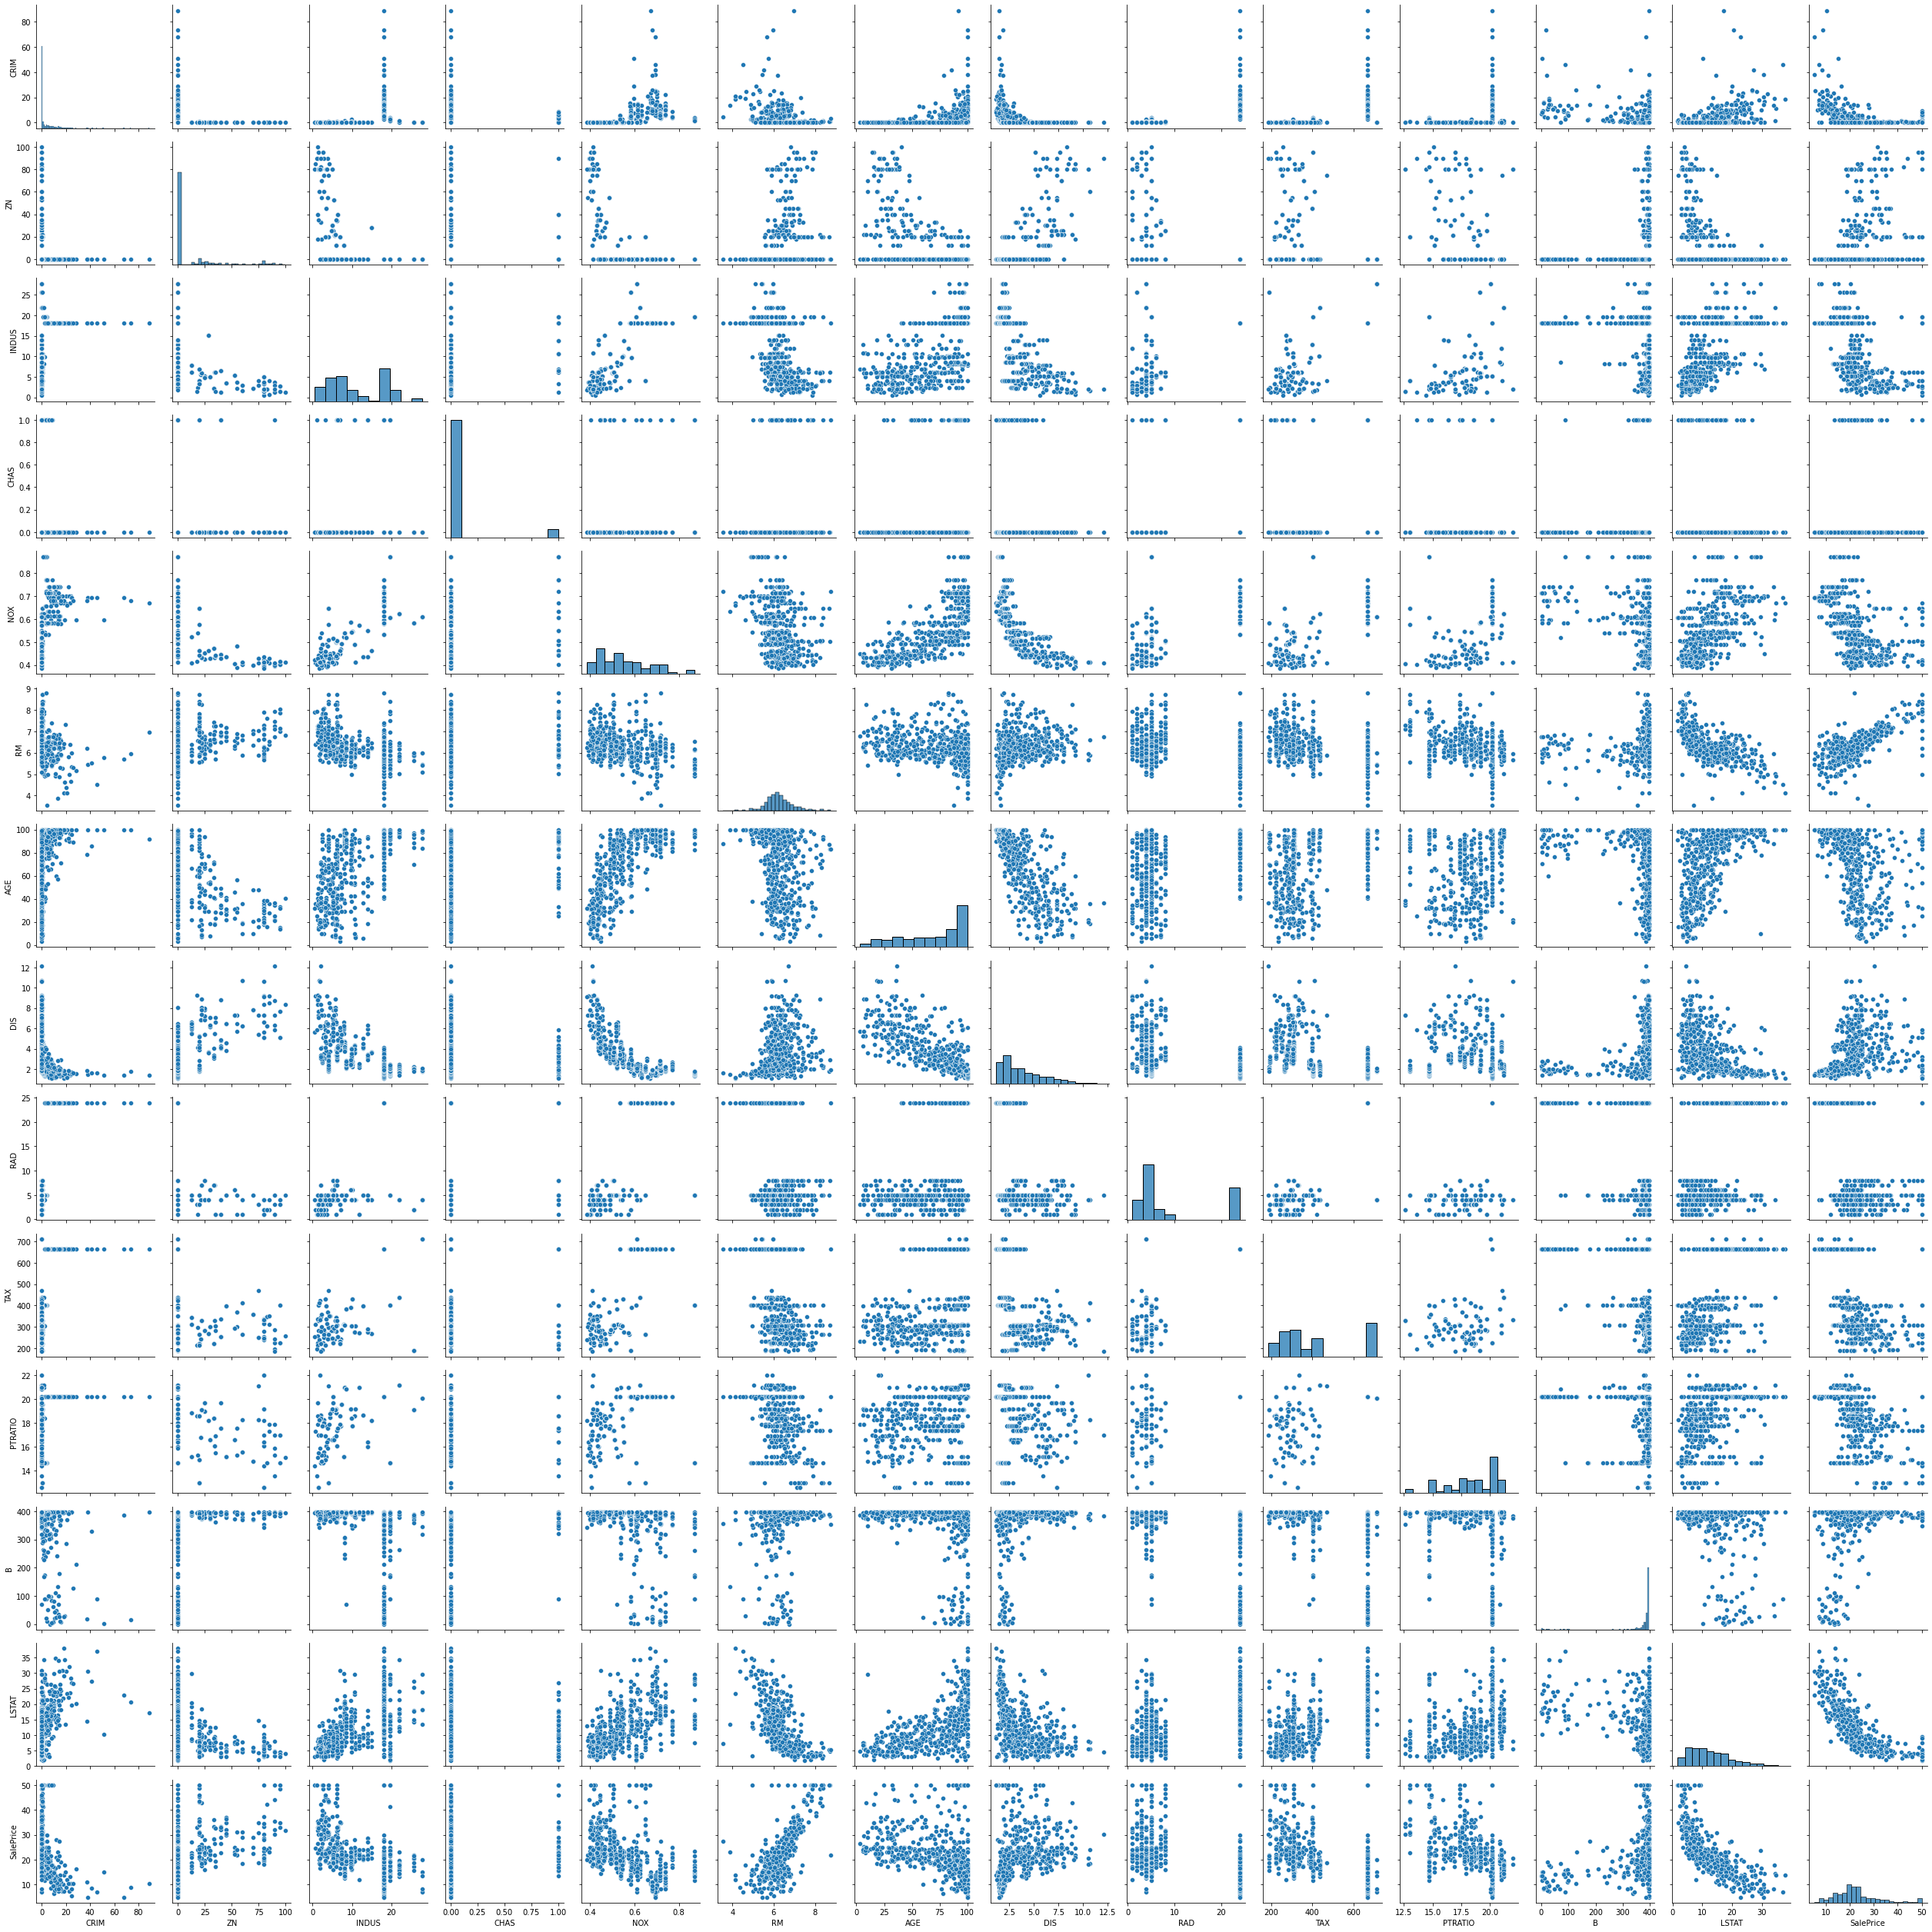

In [6]:
sns.pairplot(data, height=2.5)
plt.tight_layout()

C:\Users\admin\AppData\Local\Temp/ipykernel_22800/3036258780.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['SalePrice']);


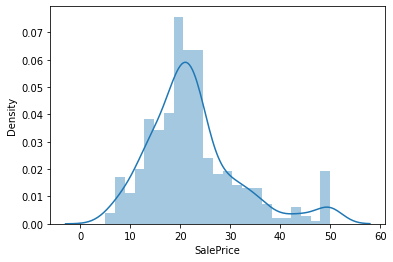

In [7]:
sns.distplot(data['SalePrice']);

In [8]:
print("skewness: %f" % data['SalePrice'].skew())
print("kurtosis: %f" % data['SalePrice'].kurt())

skewness: 1.108098
kurtosis: 1.495197


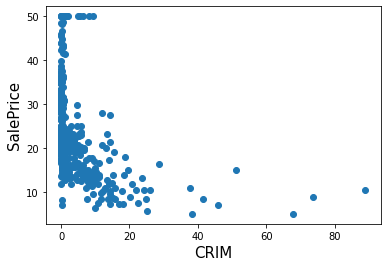

In [9]:
fig,ax = plt.subplots()
ax.scatter(x=data['CRIM'], y= data['SalePrice'])
plt.ylabel('SalePrice', fontsize=15)
plt.xlabel('CRIM', fontsize=15)
plt.show()


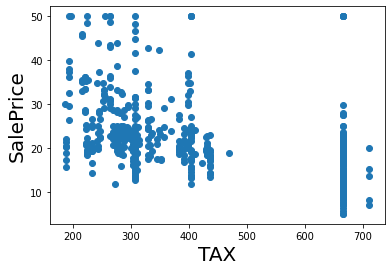

In [10]:
fig,ax = plt.subplots()
ax.scatter(x=data['TAX'], y = data['SalePrice'])
plt.xlabel('TAX', fontsize=20)
plt.ylabel('SalePrice', fontsize=20)
plt.show()


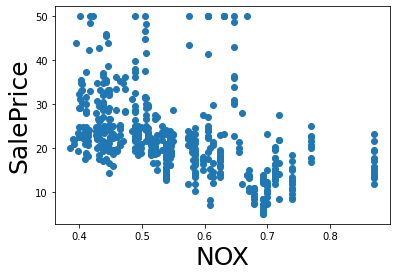

In [11]:
fig,ax = plt.subplots()
ax.scatter(x=data['NOX'],y=data['SalePrice'])
plt.xlabel('NOX', fontsize =25 )
plt.ylabel('SalePrice', fontsize =25 )
plt.show()

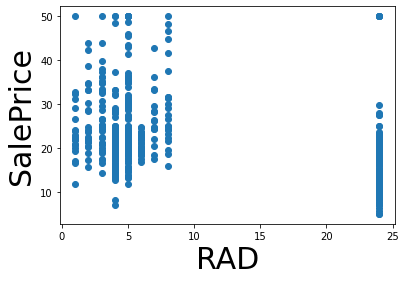

In [12]:
fig,ax = plt.subplots()
ax.scatter(x=data['RAD'],y=data['SalePrice'])
plt.xlabel('RAD',fontsize=30)
plt.ylabel('SalePrice',fontsize=30)
plt.show()

C:\Users\admin\AppData\Local\Temp/ipykernel_22800/18607324.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['SalePrice'], fit=norm);



 mu = 22.53 and sigma = 9.19



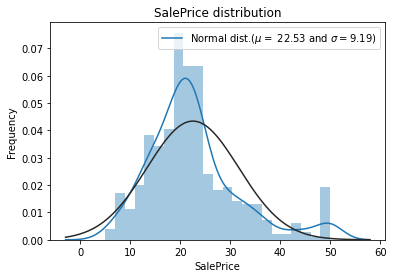

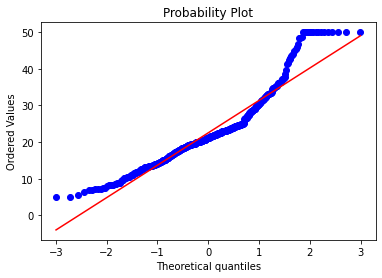

In [13]:
from scipy import stats
from scipy.stats import norm, skew
sns.distplot(data['SalePrice'], fit=norm);

(mu,sigma) = norm.fit(data['SalePrice'])
print('\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

plt.legend(['Normal dist.($\mu=$ {:.2f} and $\sigma=${:.2f})'.format(mu,sigma)],loc='best')

plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#qq plot

fig = plt.figure()
res = stats.probplot(data['SalePrice'], plot=plt)
plt.show()


C:\Users\admin\AppData\Local\Temp/ipykernel_22800/4209009112.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['SalePrice'], fit=norm);



 mu = 3.09 and sigma = 0.39



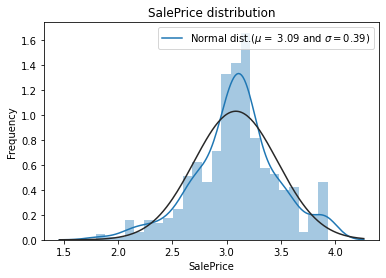

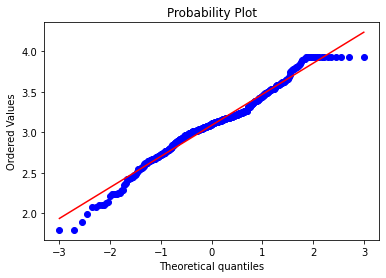

In [14]:
data['SalePrice'] = np.log1p(data['SalePrice'])

sns.distplot(data['SalePrice'], fit=norm);



(mu,sigma) = norm.fit(data['SalePrice'])
print('\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

plt.legend(['Normal dist.($\mu=$ {:.2f} and $\sigma=${:.2f})'.format(mu,sigma)],loc='best')

plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#qq plot

fig = plt.figure()
res = stats.probplot(data['SalePrice'], plot=plt)
plt.show()



# DATA CORRELATION

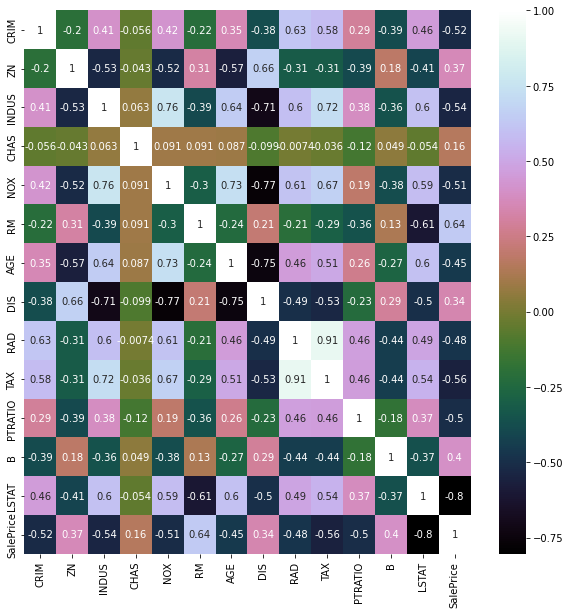

In [15]:
plt.figure(figsize=(10,10))
cor = data.corr()
sns.heatmap(cor, annot=True,cmap="cubehelix")
plt.show()

In [16]:
cor_target = abs(cor["SalePrice"])
relevant_features = cor_target[cor_target>0.5]
names = [index for index, value in relevant_features.iteritems()]
names.remove("SalePrice")
print(names)
print(len(names))  ##1)PEARSON'S CORRELATION IS USED 2)WRAPPER METHOD 3)EMBEDDED METHOD 


['CRIM', 'INDUS', 'NOX', 'RM', 'TAX', 'PTRATIO', 'LSTAT']
7


C:\Users\admin\AppData\Local\Temp/ipykernel_22800/2907975505.py:3: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  names = [index for index, value in relevant_features.iteritems()]


# MODEL BUILDING

In [17]:
from sklearn.model_selection import train_test_split

x=data.drop("SalePrice", axis=1)
y=data["SalePrice"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [18]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(404, 13)
(102, 13)
(404,)
(102,)


In [28]:
from sklearn.linear_model import LinearRegression

lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [27]:
predictions = lr.predict(x_test)
from sklearn.metrics import r2_score

print("Actual value of the house: ",y_test[0])
print("Model predicted value: ",predictions[0])
r2_score(y_test,predictions)

Actual value of the house:  3.2188758248682006
Model predicted value:  3.366894979996959


0.7452847696576532

In [25]:
from sklearn.metrics import mean_squared_error


mse = mean_squared_error(y_test,predictions)
rmse=np.sqrt(mse)
print(mse)
print(rmse)

0.03532837249537263
0.1879584328924154


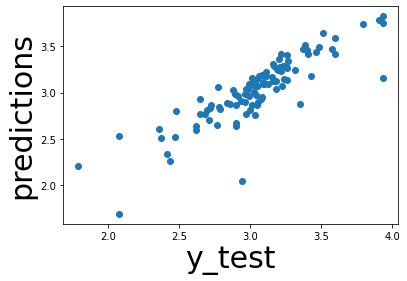

In [22]:
fig,ax = plt.subplots()
ax.scatter(x= y_test,y= predictions)
plt.xlabel('y_test',fontsize=30)
plt.ylabel('predictions',fontsize=30)
plt.show()

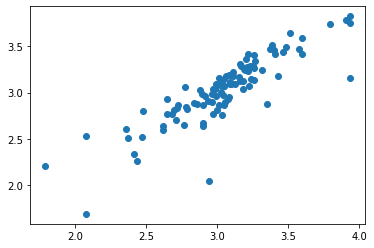

In [23]:
plt.scatter(y_test,predictions)